### Lab 2 : Pizza Liking Prediction using kNN

In [2]:
import pandas as pd

### Step1. [Prepare your dataset]

In [3]:
eat = pd.read_csv("pizza.csv")

### Step2. [Import dataset]. Using Pandas, import “pizza.csv” file and print properties such as head(),shape, columns and info

In [4]:
eat.head()

,age,weight,likepizza
0,50,65,0
1,20,55,1
2,15,40,1
3,70,65,0
4,30,70,1


In [5]:
eat.shape

(6, 3)

In [6]:
eat.columns

Index(['age', 'weight', 'likepizza'], dtype='object')

In [7]:
eat.info

<bound method DataFrame.info of    age  weight  likepizza
0   50      65          0
1   20      55          1
2   15      40          1
3   70      65          0
4   30      70          1
5   75      60          0>

### Step3. [Visualize Relationships]. Plot relplot between “age” and “weight”, with hue as “likePizza"

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='weight'>

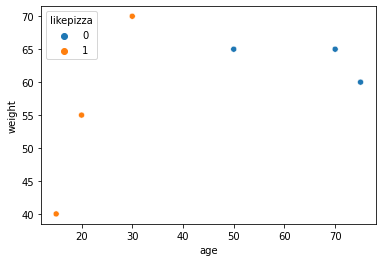

In [9]:
sns.scatterplot(x=eat['age'], y=eat['weight'], hue=eat['likepizza'])

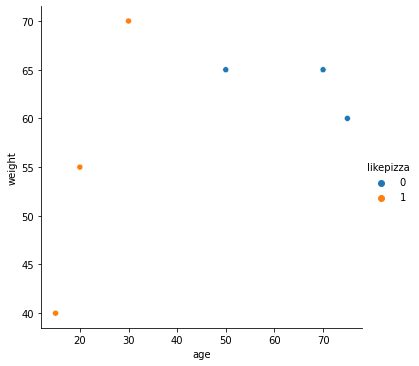

In [10]:
sns.relplot(x='age', y='weight',hue='likepizza',data=eat, kind='scatter');

### Step4. [Prepare X matrix and y vector]. Extract “age” and “weight” columns and store into new dataframe X. Similarly, extract "likePizza” column and store into y.

In [12]:
y=eat.likepizza      

In [13]:
feax = ['age','weight']
X=eat[feax]

### Step5. [Examine X and y]. Print X, y, type of X and type of y.

In [14]:
X

,age,weight
0,50,65
1,20,55
2,15,40
3,70,65
4,30,70
5,75,60


In [15]:
y

0    0
1    1
2    1
3    0
4    1
5    0
Name: likepizza, dtype: int64

In [17]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
y.dtype

dtype('int64')

In [15]:
X.dtypes

age       int64
weight    int64
dtype: object

### Step6. [Model building]. Create KNeighborsClassifier(n_neighbors=2) from sklearn and perform fit on X and y.

In [16]:
!pip install sklearn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
piz_eat = KNeighborsClassifier(n_neighbors=2)
piz_eat.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [20]:
piz_eat.predict(X)

array([0, 1, 1, 0, 1, 0], dtype=int64)

### Step7. [Model testing]. Using your KNN model, predict if a person will like Pizza or not.

In [21]:
new=[[25,50],[60,60]]

In [21]:
print(piz_eat.predict(new))

[1 0]


### Step.8 [Change n_neighbors = 3]. Now, create new model, perform fit and predict steps. Check results for the above 2 queries. Are they same?

In [24]:
piz3_eat = KNeighborsClassifier(n_neighbors=3)
piz3_eat.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [25]:
piz3_eat.predict(X)

array([0, 1, 1, 0, 1, 0], dtype=int64)

In [26]:
ne=[[25,50],[60,60]]

In [27]:
print(piz3_eat.predict(new))

[1 0]


### Step9. [Predict on entire dataset]. Now, perform prediction on entire X matrix and store result as y_pred.

In [24]:
y_pred = piz3_eat.predict(X)

In [25]:
y_pred

array([0, 1, 1, 0, 1, 0], dtype=int64)

In [29]:
y.shape[0]

6

### Step10. [Accuracy function]. Create a function accuracy() and returns accuracy. The accuracy function can be defined as follows:

In [26]:
def accuracy(actual,pred):
    return sum(actual == pred) / float(actual.shape[0])

### Step11. [Find accuracy]. Call accuracy() with y and y_pred as parameters and print accuracy score. Are you getting score as 1.0

In [27]:
accuracy(y,y_pred)

1.0

### Step12. [Prediction on pizza_test Set]

In [30]:
heal = pd.read_csv("pizza_test.csv")

In [31]:
heal.head()

,age,weight,likepizza
0,48,68,1
1,35,45,1
2,15,40,0
3,55,65,0


In [30]:
heal.shape

(4, 3)

In [31]:
heal.columns

Index(['age', 'weight', 'likepizza'], dtype='object')

In [32]:
heal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4 non-null      int64
 1   weight     4 non-null      int64
 2   likepizza  4 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes


In [33]:
y=heal.likepizza

In [34]:
fel = ['age','weight']
X=heal[fel]

In [52]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [35]:
X.dtypes

age       int64
weight    int64
dtype: object

In [36]:
X

,age,weight
0,48,68
1,35,45
2,15,40
3,55,65


In [37]:
y.dtype

dtype('int64')

In [38]:
y

0    1
1    1
2    0
3    0
Name: likepizza, dtype: int64

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
piz_hel = KNeighborsClassifier(n_neighbors=2)
piz_hel.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [51]:
y_ped = piz_hel.predict(X)
y_ped

array([0, 0, 0, 0], dtype=int64)

In [42]:
def accuracy(actual,pred):
    return sum(actual == pred) / float(actual.shape[0])

In [43]:
accuracy(y,y_ped)

0.5

### Step13. [Find best value for k]. If you want to improve the accuracy of your model, then you should use the best value k for the nearest neighbors.

In [46]:
scores = []
for k in range(1,4):
    best = KNeighborsClassifier(n_neighbors=k)
    best.fit(X, y)
    y_predt = best.predict(X)
    acc=accuracy(y,y_predt)
    scores.append((k,acc))    

In [47]:
scores

[(1, 1.0), (2, 0.5), (3, 0.5)]

### Step14. [accuracy_score function]. Call accuracy_score() function with y_test and y_pred values. You can import as “from sklearn.metrics import accuracy_score”.

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y,y_predt)

0.5